**Objective of The Heart Failure Analysis Project**

Principle 1: Communication & Readability

Principle 2: Doing the Right Thing with Right Strategy

Principle 3: Usability & Accuracy

-----------------------------------------------------

In this task, we hold the trial and error spirit to experiment data and model building that included to bring an unique solutions that is outside of the box into implementation and examine the impacts.

We start by applying query to understand positive sample and EDA to understand the big picture of the original dataset. We then bringing together variety of feature selections, understanding the pros and cons and examine the differences influence of feature selection to model building. We believe the basic strategy is powerful. Therefore, we brought together both basic and advanced techniques to explore the opportunity.

Neverthesless, different cross validation methods will be compare and understand as well as implement as part of the strategy.



**Hypothesis**
If the dataset present minimal relationship to each others, can we undertake steps that to test the underlying connection and learn to build a machine learning that have high predictive power? If so, what is the steps we need to take?

**Problem Statement**: What features predict the early detection of heart failure?

# Step 1: Import necessary packages & evaluation metrices

In [1]:
# Importing numpy and pandas
import pandas as pd
import numpy as np

In [2]:
# Importing visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [3]:
# Installing relevant libraries
# Can also use dtale
!pip install dataprep

In [4]:
# Import feature selection libraries
# We use featurewiz for MRMR (Minimum Redundancy Maximum Relevance)
!pip install featurewiz
!pip install autofeat

In [5]:
# Libraries for model interpretation
# These included use of LIME, SHAP, ELI5, SHAPASH, DALEX & EXPLAINER DASHBORD
# Also explore dash and streamlit

# In this task, we will explore both SHAP & dashboardexplainer
!pip install explainerdashboard
!pip install SHAP

In [6]:
# Install lazyclassifier
!pip install lazypredict

# Install key algorithms
!pip install catboost
!pip install snntorch
!pip install xgboost
!pip install lightgbm
!pip install NetworkX

In [7]:
# Import evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_recall_fscore_support, precision_score, recall_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Step 2: Read the dataset & create a report to preview the data

In [8]:
# Read the file
df= pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [9]:
# Explore data with dataprep
from dataprep.eda import create_report
hc_report = create_report(df, title= "Heart Failure Report")
hc_report

Output hidden; open in https://colab.research.google.com to view.

Observation:
- The dataset has total 13 variables, 7 are numerical and 6 are categorical.


Report of the distribution:

-
-
-


# Step 3: Exploring positive death_event sample

In [10]:
# Let's explore the dataset
# We first explore the death event
death_1= df[(df.DEATH_EVENT== 1)]

Let's further exploring those who respond positive to death event by creating a separate csv files.

In [11]:
# Save the death event to a separate dataset
death_1.to_csv("positive_death.csv")

In [12]:
# Display the positive sample
positive_death= pd.read_csv("positive_death.csv")

We started by categories the data based on the age, that are being categories as:

(a) class_1: 40-49 years old

(b) class_2: 50-59 years old

(c) class_3: 60-69 years old

(d) class_4: 70-79 years old

(e) class_5: 80-89 years old

(f) class_6: 90-99 years old

In [13]:
# Preprocess the positive sample
# Dropping unnecessary column
positive_death.drop(["Unnamed: 0"], axis= 1)

# Create an age group
age_bins= [40, 49, 59, 69, 79, 89, 99]
age_labels= ["40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
positive_death["age_group"]= pd.cut(positive_death["age"], bins= age_bins, labels= age_labels)

In [14]:
# Dropping unnecessary column
positive_death.drop(["Unnamed: 0"], axis= 1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1,70-79
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1,50-59
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1,60-69
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1,50-59
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1,70-79
92,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1,60-69
93,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1,50-59
94,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1,60-69


In [15]:
# Rearrange the columns
positive_death= positive_death[["age",
                                "age_group",
                                "anaemia",
                                "creatinine_phosphokinase",
                                "diabetes", "ejection_fraction",
                                "high_blood_pressure",
                                "platelets",
                                "serum_creatinine",
                                "serum_sodium",
                                "sex",
                                "smoking",
                                "time",
                                "DEATH_EVENT"]]

Before we proceed to feature selection, we now asked a series of question to help us further understand the dataset.

1. At which age group, people suffering from anemia?

2. What is the average creatinine_phosphok on different age group?

3. At which age group, people suffering from diabetes?

4. What is the average ejection_fraction on different age group?

5. At which age group, people are suffering of high blood pressure the most?

6. What is the average platelets on different age group?

7. What is the average serum_creatinine on different age group?

8. What is the average serum_sodium on different age group?

9. At which age group people smoke the most? What is the gender?

10. At what age group, the positive death event accounted the most? Gender?


We know that we have 96 records of positive records in the dataset, we extracted data using pandas queries

In [16]:
# At what age group, people are suffering anemia the most?, Sort from highest to lowest
q1= positive_death.groupby(["age_group", "anaemia"]).size().reset_index(name= "COUNT(*)")
q1= q1.sort_values(["anaemia", "COUNT(*)"], ascending= (False, False))
q1

# One more thing we can do is that we can studies the proportion

,age_group,anaemia,COUNT(*)
5,60-69,1,12
3,50-59,1,11
7,70-79,1,10
9,80-89,1,5
1,40-49,1,4
11,90-99,1,4
4,60-69,0,15
6,70-79,0,10
2,50-59,0,9
8,80-89,0,8


In [17]:
# What is the mean, median of creatinine_phosphok on different age group?
q2= positive_death.groupby(["age_group"]).creatinine_phosphokinase.aggregate(["mean","median", "min", "max"]).reset_index()
q2= q2.rename(columns= {"mean": "cp_mean",
                        "median": "cp_median",
                        "min": "cp_min",
                        "max": "cp_max"})

q2= q2.sort_values(["cp_mean"], ascending= (False))
q2

,age_group,cp_mean,cp_median,cp_min,cp_max
0,40-49,1344.636364,582.0,131,7702
1,50-59,914.950000,264.5,60,7861
4,80-89,805.692308,379.0,23,5882
2,60-69,469.629630,231.0,47,3964
3,70-79,346.150000,287.0,69,943
5,90-99,234.400000,112.0,47,582


In [18]:
# At which age group, people suffering from diabetes?
q3= positive_death.groupby(["age_group", "diabetes"]).size().reset_index(name= "COUNT(*)")
q3= q3.sort_values(["diabetes", "COUNT(*)"], ascending= (False, False))
q3

,age_group,diabetes,COUNT(*)
5,60-69,1,16
3,50-59,1,7
1,40-49,1,6
7,70-79,1,5
9,80-89,1,4
11,90-99,1,2
6,70-79,0,15
2,50-59,0,13
4,60-69,0,11
8,80-89,0,9


In [19]:
# What is the average ejection_fraction on different age group?
q4= positive_death.groupby(["age_group"]).ejection_fraction.aggregate(["mean","median", "min", "max"]).reset_index()
q4= q4.rename(columns= {"mean": "ef_mean",
                        "median": "ef_median",
                        "min": "ef_min",
                        "max": "ef_max"})
q4= q4.sort_values(["ef_mean"], ascending= (False))
q4

,age_group,ef_mean,ef_median,ef_min,ef_max
4,80-89,39.615385,38.0,20,60
5,90-99,39.600000,40.0,30,50
2,60-69,33.740741,30.0,20,65
3,70-79,32.550000,30.0,15,60
1,50-59,32.350000,30.0,20,70
0,40-49,26.454545,25.0,14,55


In [20]:
# At what age group, people are suffering of high blood pressure?
q5= positive_death.groupby(["age_group", "high_blood_pressure"]).size().reset_index(name= "COUNT(*)")
q5= q5.sort_values(["high_blood_pressure", "COUNT(*)"], ascending= (False, False))
q5

,age_group,high_blood_pressure,COUNT(*)
7,70-79,1,13
3,50-59,1,8
5,60-69,1,6
1,40-49,1,5
9,80-89,1,4
11,90-99,1,3
4,60-69,0,21
2,50-59,0,12
8,80-89,0,9
6,70-79,0,7


In [21]:
# What is the average platelets on different age group?
q6= positive_death.groupby(["age_group"]).platelets.aggregate(["mean","median", "min", "max"]).reset_index()
q6= q6.rename(columns= {"mean": "p_mean",
                        "median": "p_median",
                        "min": "p_min",
                        "max": "p_max"})

q6= q6.sort_values(["p_mean"], ascending= (False))
q6

,age_group,p_mean,p_median,p_min,p_max
3,70-79,279803.704500,263358.030,127000.0,621000.0
5,90-99,270071.606000,226000.000,196000.0,461000.0
2,60-69,263248.742963,255000.000,62000.0,497000.0
0,40-49,242818.181818,244000.000,87000.0,390000.0
4,80-89,241132.004615,262000.000,47000.0,388000.0
1,50-59,237635.803000,242179.015,70000.0,418000.0


In [22]:
# What is the average serum_creatinine on different age group?
q7= positive_death.groupby(["age_group"]).serum_creatinine.aggregate(["mean","median", "min", "max"]).reset_index()
q7= q7.rename(columns= {"mean": "sc_mean",
                        "median": "sc_median",
                        "min": "sc_min",
                        "max": "sc_max"})

q7= q7.sort_values(["sc_mean"], ascending= (False))
q7

,age_group,sc_mean,sc_median,sc_min,sc_max
4,80-89,2.271538,1.30,0.9,9.4
1,50-59,1.931500,1.15,0.6,9.0
2,60-69,1.912222,1.50,0.6,6.8
3,70-79,1.696000,1.70,1.0,4.0
5,90-99,1.586000,1.83,1.0,2.1
0,40-49,1.327273,1.10,0.8,2.1


In [23]:
# What is the average serum_sodium on different age group?
q8= positive_death.groupby(["age_group"]).serum_sodium.aggregate(["mean","median", "min", "max"]).reset_index()
q8= q8.rename(columns= {"mean": "ss_mean",
                        "median": "ss_median",
                        "min": "ss_min",
                        "max": "ss_max"})

q8= q8.sort_values(["ss_mean"], ascending= (False))
q8

,age_group,ss_mean,ss_median,ss_min,ss_max
3,70-79,136.450000,136.0,130,145
1,50-59,135.800000,136.0,128,142
4,80-89,135.538462,134.0,132,145
2,60-69,135.185185,136.0,116,146
5,90-99,134.000000,134.0,132,138
0,40-49,133.545455,136.0,121,145


In [24]:
# At which age group people smoke the most? What is the gender?
q9= positive_death.groupby(["age_group", "smoking"]).size().reset_index(name= "COUNT(*)")
q9= q9.sort_values(["smoking", "COUNT(*)"], ascending= (False, False))
q9

,age_group,smoking,COUNT(*)
5,60-69,1,10
7,70-79,1,8
3,50-59,1,5
9,80-89,1,5
1,40-49,1,1
11,90-99,1,1
4,60-69,0,17
2,50-59,0,15
6,70-79,0,12
0,40-49,0,10


In [25]:
# At what age group, the positive death event accounted the most? Gender?
q10= positive_death.groupby(["age_group", "sex", "DEATH_EVENT"]).size().reset_index(name= "COUNT(*)")
q10= q10.sort_values(["DEATH_EVENT", "sex", "COUNT(*)"], ascending= (False, False, False))
q10

,age_group,sex,DEATH_EVENT,COUNT(*)
5,60-69,1,1,17
7,70-79,1,1,13
3,50-59,1,1,11
9,80-89,1,1,10
1,40-49,1,1,7
11,90-99,1,1,4
4,60-69,0,1,10
2,50-59,0,1,9
6,70-79,0,1,7
0,40-49,0,1,4


-----------------------------------------------------
# Step 4: We examine the quantitative data of the sample

We now examine the statistical quantitative aspect of the data. We first to understand the mean, median and standard deviation of the data from full dataset, deadth patient and survival patient sample set.

In [26]:
# Full dataset
full_sample= df.copy()

# Positive dataset
positive_sample= df[(df.DEATH_EVENT== 1)]

# Negative dataset
negative_sample= df[(df.DEATH_EVENT== 0)]

In [27]:
# Now, we select only quantitaive data (7 variables)
full_quan= full_sample.loc[:, ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

# Now, we select only quantitaive data
positive_quan= positive_sample.loc[:, ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

# Now, we select only quantitaive data
negative_quan= negative_sample.loc[:, ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

In [28]:
# Understand the describe function of the data
full_describe= full_quan.describe()
positive_describe= positive_quan.describe()
negative_describe= negative_quan.describe()

In [29]:
# Extract a certain rows of data
# Full dataset
full_mean= full_describe.loc["mean"]
full_median= full_describe.loc["50%"]
full_sd= full_describe.loc["std"]

# Positive dataset
positive_mean= positive_describe.loc["mean"]
positive_median= positive_describe.loc["50%"]
positive_sd= positive_describe.loc["std"]

# Negative datset
negative_mean= negative_describe.loc["mean"]
negative_median= negative_describe.loc["50%"]
negative_sd= negative_describe.loc["std"]

In [30]:
# Convert the data into dataframe
a= pd.DataFrame(full_mean)
b= pd.DataFrame(full_median)
c= pd.DataFrame(full_sd)
d= pd.DataFrame(positive_mean)
e= pd.DataFrame(positive_median)
f= pd.DataFrame(positive_sd)
g= pd.DataFrame(negative_mean)
h= pd.DataFrame(negative_median)
i= pd.DataFrame(negative_sd)

In [31]:
# Rename the column
a.columns=["full_mean"]
b.columns=["full_median"]
c.columns= ["full_std"]
d.columns= ["positive_mean"]
e.columns= ["positive_median"]
f.columns= ["positive_std"]
g.columns= ["negative_mean"]
h.columns= ["negative_median"]
i.columns=["negative_std"]

In [32]:
# Concat all the dataframe together to compare
stat_quan= pd.concat((a, b,c, d, e, f, g, h, i), axis=1)
stat_quan

,full_mean,full_median,full_std,positive_mean,positive_median,positive_std,negative_mean,negative_median,negative_std
age,60.833893,60.0,11.894809,65.215281,65.0,13.214556,58.761906,60.0,10.637890
creatinine_phosphokinase,581.839465,250.0,970.287881,670.197917,259.0,1316.580640,540.054187,245.0,753.799572
ejection_fraction,38.083612,38.0,11.834841,33.468750,30.0,12.525303,40.266010,38.0,10.859963
platelets,263358.029264,262000.0,97804.236869,256381.044792,258500.0,98525.682856,266657.489901,263000.0,97531.202283
serum_creatinine,1.393880,1.1,1.034510,1.835833,1.3,1.468562,1.184877,1.0,0.654083
serum_sodium,136.625418,137.0,4.412477,135.375000,135.5,5.001579,137.216749,137.0,3.982923
time,130.260870,115.0,77.614208,70.885417,44.5,62.378281,158.339901,172.0,67.742872


# Step 5: Create an age group data

In [33]:
# Let's also create a age_group for df
# View the original df
df.head(5)

# Make a copy of df
df_1= df.copy()

# Create an age group
age_bins= [40, 49, 59, 69, 79, 89, 99]
age_labels= ["40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
df_1["age_group"]= pd.cut(df_1["age"], bins= age_bins, labels= age_labels)

In [34]:
# Rearrange the columns
df_1= df_1[["age",
            "age_group",
            "anaemia",
            "creatinine_phosphokinase",
            "diabetes",
            "ejection_fraction",
            "high_blood_pressure",
            "platelets",
            "serum_creatinine",
            "serum_sodium",
            "sex",
            "smoking",
            "time",
            "DEATH_EVENT"]]

df_1

,age,age_group,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,70-79,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,50-59,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,60-69,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,50-59,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,60-69,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,60-69,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,50-59,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,40-49,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,40-49,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Step 6: Normalise the dataset

In [35]:
# Defining X & Y
X= df.drop(["DEATH_EVENT"], axis= 1)
Y= df[["DEATH_EVENT"]]

In [36]:
# One more step before we perform train_test_valid split is to standardise the data
from sklearn.preprocessing import Normalizer
normaliser= Normalizer()
normaliser

X_std= normaliser.fit_transform(X)

#scaler= StandardScaler()
#X_std= scaler.fit_transform(X)

In [37]:
# Convert the dataset into indexing for the purpose of stratified holdout validation
X_df = pd.DataFrame(X_std, columns= ["age",
                                     "anaemia",
                                     "creatinine_phosphokinase",
                                     "diabetes", "ejection_fraction",
                                     "high_blood_pressure",
                                     "platelets",
                                     "serum_creatinine",
                                     "serum_sodium",
                                     "sex",
                                     "smoking",
                                     "time"])
Y_df = pd.DataFrame(Y, columns=["DEATH_EVENT"])

# Step 7: Train test split for train, valid, and test set

In [38]:
# Split the dataset with stratified data sampling method
# First create the train_test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_df, Y_df, stratify= Y_df, test_size= 0.2)
X_train, X_valid, Y_train, Y_valid= train_test_split(X_train, Y_train, stratify= Y_train, test_size= 0.2)

In [39]:
# Check the data sample size
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))
print(Y_valid.value_counts()/len(Y_valid))
# Reference: https://medium.com/analytics-vidhya/a-simple-introduction-to-validating-and-testing-a-model-part-1-2a0765deb198#:~:text=Steps%20involved%20to%20carry%20out%20this%20technique%20are%3A,training%20data%20further%20into%20train%20and%20validation%20set

DEATH_EVENT
0              0.675393
1              0.324607
dtype: float64
DEATH_EVENT
0              0.683333
1              0.316667
dtype: float64
DEATH_EVENT
0              0.6875
1              0.3125
dtype: float64


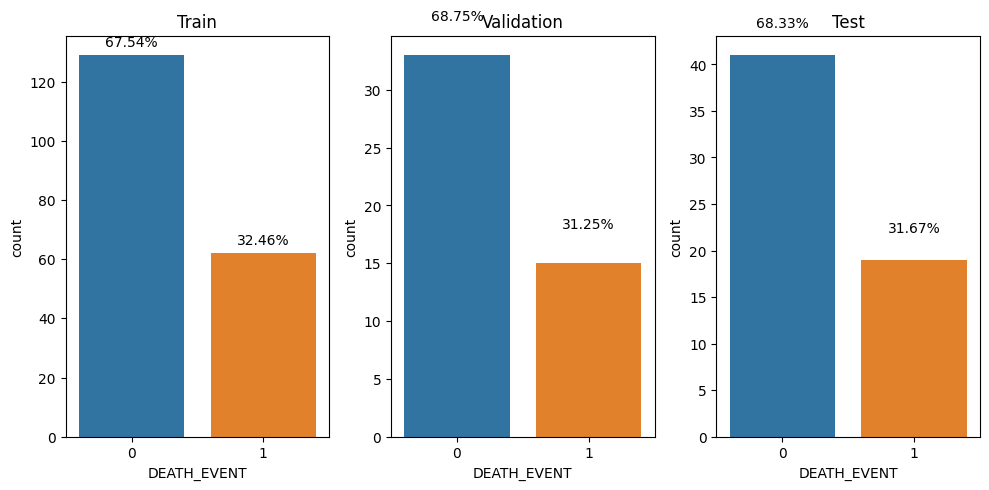

In [40]:
# Plot the bar chart with seaborn, with number of occurence and percentage needed.
datasets= {"Train": Y_train,"Validation": Y_valid, "Test": Y_test}

fig, axs= plt.subplots(1, 3, figsize=(10, 5))

for i, (name, dataset) in enumerate(datasets.items()):
    total= len(dataset)
    ax= axs[i]

    # Countplot
    sns.countplot(x= "DEATH_EVENT", data= dataset, ax= ax)

    # Adding count and percentage
    for p in ax.patches:
        height= p.get_height()
        ax.text(p.get_x()+ p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    ax.set_title(name)

plt.tight_layout()
plt.show()

Observation:
- From this observation, we can see that, the distribution of trai, valid, test class with both 0 and 1 death event appeared balanced and similar to each other. Therefore, it is convinced to say stratified split is done correctly.

-----------------------------------------------------

Let's find the important feature through feature selection.

In this section, we are not only identify significant feature, we also consider how is a significant feature contribute to the accuracy of the model? What is the quality data look like? What data is a model needed to increase the accuracy? Can the significant feature just a noise?

One certain thing we know is having a significant feature does not necessarily mean that the model will have a good accuracy, given the other factors taken into consideration.

**Search of Optimal Feature Selection**


In the journal article "Exploring Feature Selection & Classification Methods for Predicting Heart Disease" published on 2020 has applied the following 3 feature selection techniques:

- Principal component analysis
- Chi-2
- ReliefF

-----------------------------------------------------

The article named "Feature Selection & Transformation by Machine Learning Reduce Variable Numbers & Improve Prediction for Heart Failure Readmission or Death" published on 2019 applied the following techniques:

- t-test
- Chi-2
- Sequential Forward Selection
- Sequential Backward Selection
- mRMR technique (Minimal Redundancy Maximal Relevance)
- Principal component analysis for feature extraction

(The paper used MLP based model from Keras library v2.1.5 with Tensorflow backend v1.8.0)

-----------------------------------------------------
In the article "Feature Slection & Classification Systems for Chronic Disease Prediction: A Review" has mentioned the following methods:

**Filter Methods**
- Mutual Information
- MIFS-U (Mutual Information)
- Mutual Information Based Constructive Criterion
- Correlation based Feature Selection

**Wrapper Method**
- Sequential Backward Elimination with Naive Bayes, Decision Trees, and SVM with kernel function

**Embedded Method**
- Embedded Sequential Forward Selection

**Hybrid Method**, aggregates one or more approaches to take advantage of the merit of different approaches to get optimal merit.
- Boosting Based Hybrid Feature Selection
- Hybrid Genetic Algorithm Based Feature Selection
(Adding pre-selection step helped in solving the risk of overfitting)

This paper has also listed the pros and cons of each feature selection method.

-----------------------------------------------------

Paper named "MRMR-SSA: A Hybrid Approach for Optimal Feature Selection" ponted how Hybrid method perform in obtaining relevant data/ feature that contribute to the model accuracy.

SSA stand for salp sqam algorithm. This paper also implemented XGBoost, AdaBoost, Random Forests and Logistic Regression.

-----------------------------------------------------

Paper named "A Review of Feature Selection Methods for Machine Learning Based Disease Risk Prediction" published on 2022 listed range of different algorithms and worth reading.

**The differences between Embedded FS and Hybrid FS are as below**

In this task, we divided the dataset into train, validation and test set. 60% goes to train set, and the remaining 40% divide evenly into validation and test set.

Different techniques for data splitting included:
- Random- The data is shuffled, and pick randomly for train, valid, and test set. Random sampling works optimally on class balanced datasets. With imbalanced dataset, the sampling can be biased.

- Stratified- Stratified counter the issue of random sampling, where it ensure the distribution of train, validate, and test is similar to the class distribution in the original dataset.

- Cross Validation (CV)- CV also known as K-Fold CV is a more robust technique where a model is trained and evaluated "k" times on different sample.

We first exploring t-test. In term of t-test, we explore independent two sample t-test and welch two sample t-test.

The purpose of independent two sample t-test is used to determine if two population means are EQUAL.

The Welch's t-test is similar to independent two sample t-test, except it does not assume two population have an EQUAL VARIANCE.

-----------------------------------------------------

# Step 8: Implement feature selection

Step 8.1: Perform correlation with heatmap

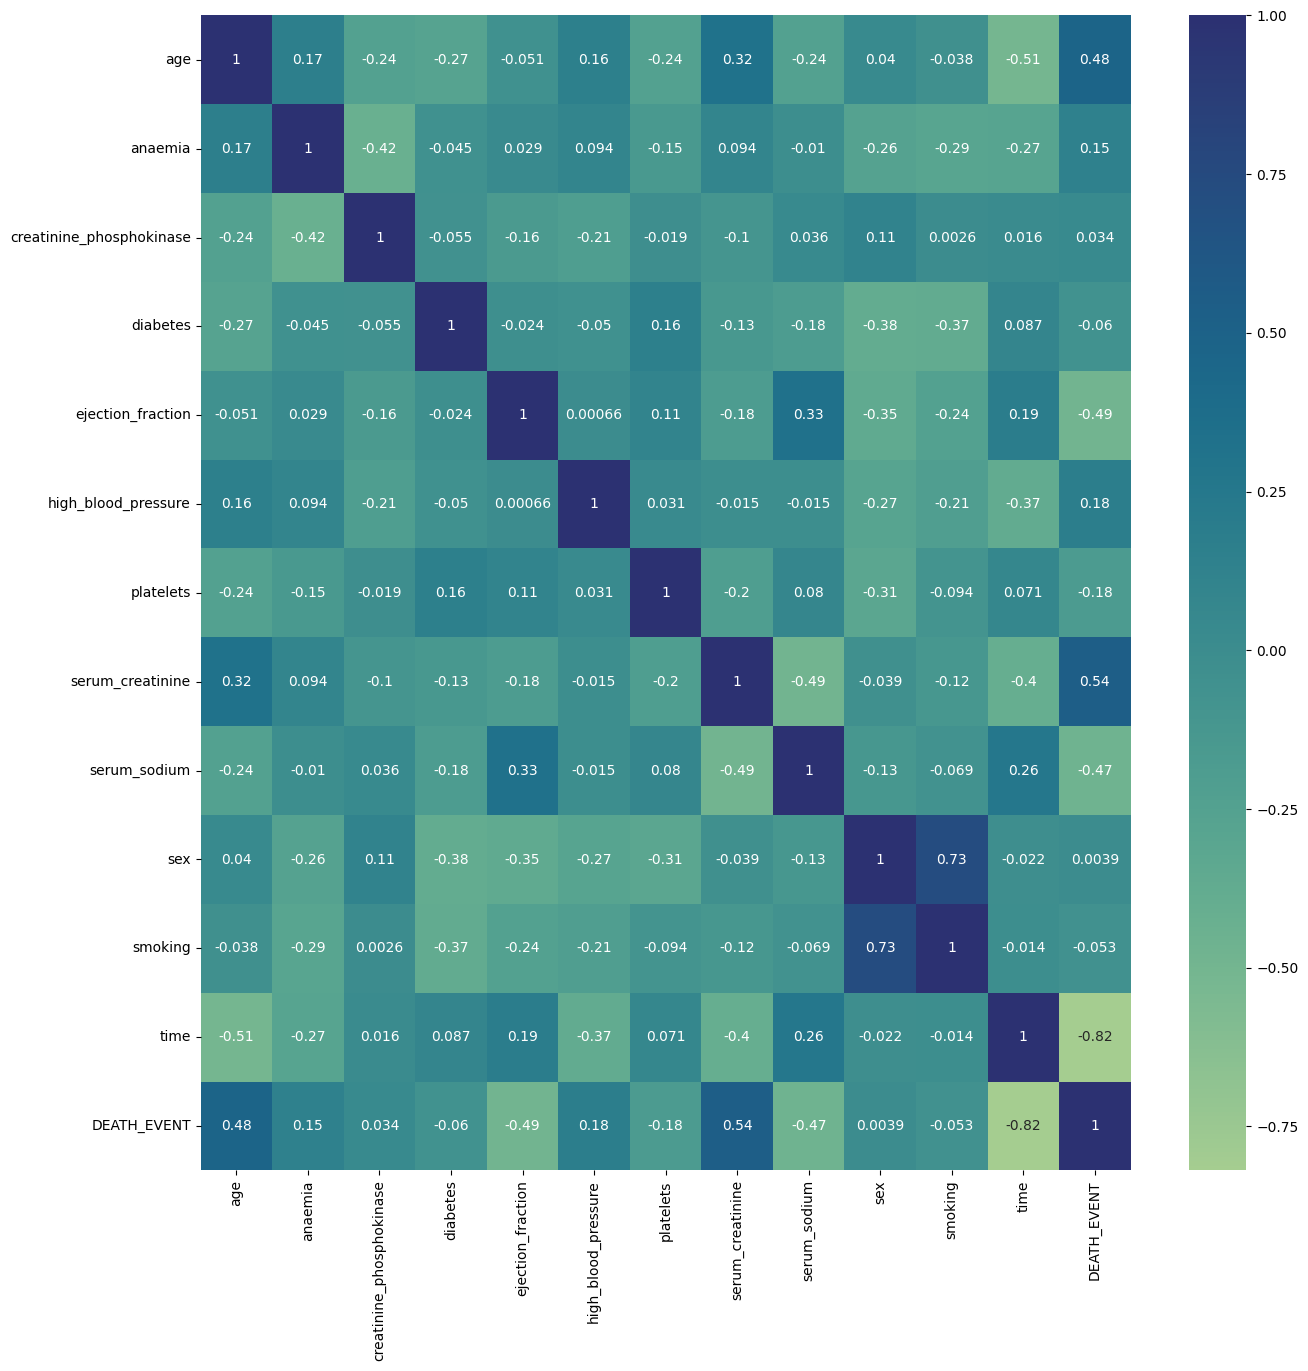

In [41]:
# Perform correlation
df_corr= df.corr()

# Define the axis, size and plot the hetamap
top_df_corr= df_corr.index
plt.figure(figsize= (15,15))

# Plot heat map
df_heatmap= sns.heatmap(df_corr[top_df_corr].corr(), annot= True, cmap= "crest")

Observation:

- Serum creatinine and age has high correlation to death event.
- The data rank as below:

1. Serum creatinine
2. Age
3. High blood pressure
4. Anaemia

Note that correlation does not mean causation, in this case, having anaemia does not necessary led to death event.

Step 8.2: Perform Feature Ranking**- **Perform Shapiro–Wilk test

In [42]:
from scipy.stats import shapiro
shapiro(df.age) # 5.3476593166124076e-05
shapiro(df.anaemia) # 6.2099638288205785e-25
shapiro(df.creatinine_phosphokinase) # 7.05055700731454e-28
shapiro(df.diabetes) # 5.115523846896366e-25
shapiro(df.ejection_fraction) # 7.215172015406779e-09
shapiro(df.high_blood_pressure) # 1.1686175589182754e-25
shapiro(df.platelets) # 2.8836867789483467e-12
shapiro(df.serum_creatinine) # 5.3927583038658e-27
shapiro(df.serum_sodium) # 9.220169072676754e-10
shapiro(df.sex) # 1.1685004623776566e-25
shapiro(df.smoking) # 4.5818434207772147e-26
shapiro(df.time) # 6.284944120693581e-09
shapiro(df.DEATH_EVENT) # 4.5818434207772147e-26

ShapiroResult(statistic=0.5881408452987671, pvalue=4.5818434207772147e-26)

The feature rank as below:

- creatinine_phosphokinase
- serum_creatinine
- smoking
- DEATH_EVENT
- sex
- high_blood_pressure
- diabetes
- anaemia
- platelets
- serum_sodium
- ejection_fraction
- age

-----------------------------------------------------

Step 8.3: Implement t-test

In [43]:
# T-test
from scipy.stats import ttest_ind

# Independent two sample t-test
group_a= df[df["DEATH_EVENT"]== 1]
group_b= df[df["DEATH_EVENT"]== 0]

# Perform independent two sample t- test
ttest_ind(group_a["creatinine_phosphokinase"], group_b["creatinine_phosphokinase"])

TtestResult(statistic=1.0831706812289021, pvalue=0.27961124573614, df=297.0)

In [44]:
# Perform Welch's t-test with no equal variance
ttest_ind(group_a["creatinine_phosphokinase"], group_b["creatinine_phosphokinase"], equal_var= False)

TtestResult(statistic=0.9011899891683772, pvalue=0.36921596064201445, df=125.32072323077125)

In [45]:
# Perform Welch's t-test with equal variance
ttest_ind(group_a["creatinine_phosphokinase"], group_b["creatinine_phosphokinase"], equal_var= True)

TtestResult(statistic=1.0831706812289021, pvalue=0.27961124573614, df=297.0)

In [46]:
# Perform independent two sample t- test
ttest_ind(group_a["ejection_fraction"], group_b["ejection_fraction"])

TtestResult(statistic=-4.80562826839639, pvalue=2.452897418208845e-06, df=297.0)

In [47]:
# Perform Welch's t-test with no equal variance
ttest_ind(group_a["ejection_fraction"], group_b["ejection_fraction"], equal_var= False)

TtestResult(statistic=-4.56698316342773, pvalue=9.647152798521775e-06, df=164.7609594812801)

In [48]:
# Perform Welch's t-test with equal variance
ttest_ind(group_a["ejection_fraction"], group_b["ejection_fraction"], equal_var= True)

TtestResult(statistic=-4.80562826839639, pvalue=2.452897418208845e-06, df=297.0)

In [49]:
# Perform independent two sample t- test
ttest_ind(group_a["high_blood_pressure"], group_b["high_blood_pressure"])

TtestResult(statistic=1.3718371343161466, pvalue=0.17114949852935332, df=297.0)

In [50]:
# Perform Welch's t-test with no equal variance
ttest_ind(group_a["high_blood_pressure"], group_b["high_blood_pressure"], equal_var= False)

TtestResult(statistic=1.3473895753305658, pvalue=0.1795643234241027, df=178.3213814403988)

In [51]:
# Perform Welch's t-test with equal variance
ttest_ind(group_a["high_blood_pressure"], group_b["high_blood_pressure"], equal_var= True)

TtestResult(statistic=1.3718371343161466, pvalue=0.17114949852935332, df=297.0)

In [52]:
# Perform independent two sample t- test
ttest_ind(group_a["serum_creatinine"], group_b["serum_creatinine"])

TtestResult(statistic=5.306457599754319, pvalue=2.1901978548979685e-07, df=297.0)

In [53]:
# Perform Welch's t-test with no equal variance
ttest_ind(group_a["serum_creatinine"], group_b["serum_creatinine"], equal_var= False)

TtestResult(statistic=4.152639017521322, pvalue=6.398962339971595e-05, df=113.19175645815245)

In [54]:
# Perform Welch's t-test with equal variance
ttest_ind(group_a["serum_creatinine"], group_b["serum_creatinine"], equal_var= True)

TtestResult(statistic=5.306457599754319, pvalue=2.1901978548979685e-07, df=297.0)

In [55]:
# Perform independent two sample t- test
ttest_ind(group_a["smoking"], group_b["smoking"])

TtestResult(statistic=-0.21756080880080328, pvalue=0.8279207128092408, df=297.0)

In [56]:
# Perform Welch's t-test with no equal variance
ttest_ind(group_a["smoking"], group_b["smoking"], equal_var= False)

TtestResult(statistic=-0.21816842177108034, pvalue=0.8275347716935684, df=187.79965427968529)

In [57]:
# Perform Welch's t-test with equal variance
ttest_ind(group_a["smoking"], group_b["smoking"], equal_var= True)

TtestResult(statistic=-0.21756080880080328, pvalue=0.8279207128092408, df=297.0)

Observation:
- From what we observed, ejection_fraction and serum_creatinine appeared to be important features in the dataset. However, it is important to bear in mind that the statiscally significant doesn't always mean practically significant.

Step 8.4: Implement chi-2

In [58]:
# Perform chi-2 feature selection
from sklearn.feature_selection import SelectKBest, chi2
Chi2= SelectKBest(score_func= chi2, k= 5)
Chi2_fit= Chi2.fit(X_train, Y_train)

Chi2scores= pd.DataFrame(Chi2_fit.scores_)
Chi2columns= pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization
featureScores= pd.concat([Chi2columns, Chi2scores], axis= 1)
featureScores.columns= ["Feature Name","Score"]
print(featureScores.nlargest(5, "Score"))

                Feature Name     Score
11                      time  0.016491
2   creatinine_phosphokinase  0.007754
0                        age  0.000155
4          ejection_fraction  0.000097
7           serum_creatinine  0.000039


Step 8.5: Implement f_regression

In [59]:
# Perform f_regression
from sklearn.feature_selection import f_regression

fr= SelectKBest(score_func= f_regression, k= 5)
fr_fit= fr.fit(X_train, Y_train)

frscores = pd.DataFrame(fr_fit.scores_)
frcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([frcolumns, frscores],axis= 1)
featureScores.columns = ["Feature Name", "Score"]
print(featureScores.nlargest(5, "Score"))


                Feature Name      Score
11                      time  15.352773
7           serum_creatinine   5.733539
1                    anaemia   3.778650
6                  platelets   1.179151
2   creatinine_phosphokinase   0.803252


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SteP 8.6: Implement mutual information gain

In [60]:
# Perform mutual information
from sklearn.feature_selection import mutual_info_classif

threshold= 5
high_score_features= []
feature_scores = mutual_info_classif(X_train, Y_train, random_state= 0)
for score, f_name in sorted(zip(feature_scores, X.columns), reverse= True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
MIC= X[high_score_features]
print(MIC.columns)

time 0.18666026080825726
age 0.08399708290732288
platelets 0.08175662059136535
serum_creatinine 0.0643905426625011
anaemia 0.032137255126733155
Index(['time', 'age', 'platelets', 'serum_creatinine', 'anaemia'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Step 8.7: Implement ExtraTreeClassifier

<ipython-input-61-152b1667c40f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  XT_fit= XT.fit(X_train, Y_train)


[0.09021696 0.05319971 0.06974214 0.04701496 0.10262491 0.03524128
 0.06275416 0.11082781 0.06415338 0.04937716 0.03811016 0.27673735]


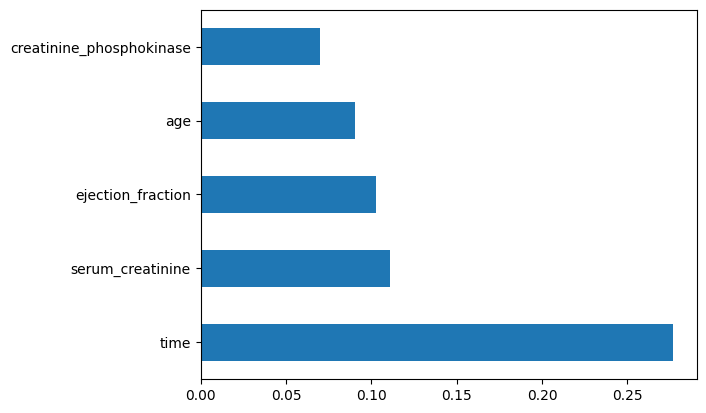

In [61]:
# Perform Extratree feature selection
from sklearn.ensemble import ExtraTreesClassifier
XT= ExtraTreesClassifier()
XT_fit= XT.fit(X_train, Y_train)
print(XT.feature_importances_)

# Visualize the plot
feat_importances = pd.Series(XT.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Step 8.8 Implement autofeat

In [62]:
# Perform AutoFeat (Linear realtionship)
from autofeat import FeatureSelector

autofeat= FeatureSelector()
aufofeat_fit= autofeat.fit_transform(X_train, Y_train)
aufofeat_fit.head(1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,time,serum_creatinine,age,platelets
0,0.000816,0.000004,0.000201,0.999998


Step 8.9: Implement featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has 

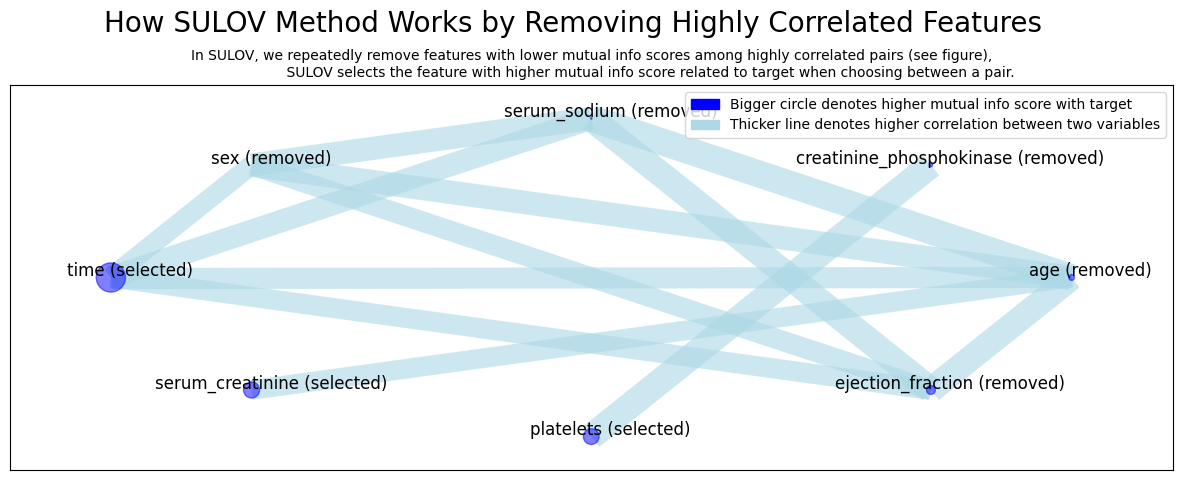

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 7
Final list of selected 7 vars after SULOV = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'time', 'serum_creatinine', 'platelets']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 3 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 100
        Selected: ['time', 'serum_creatinine', 'platelets']
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['time', 'serum_creatinine', 'platelets']
            Time taken for regular XGBoost feature selection = 0 

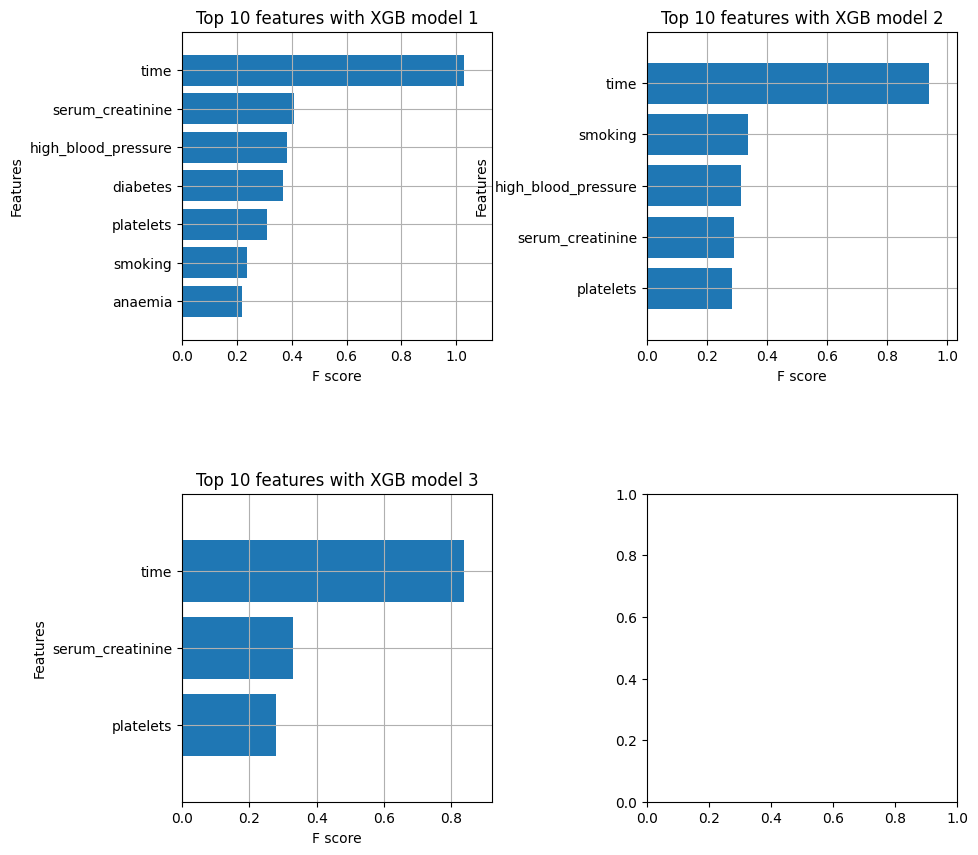

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 3 important features:
['time', 'serum_creatinine', 'platelets']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 3 important features and a train dataframe
    Time taken to create entire pipeline = 1 second(s)


['time', 'serum_creatinine', 'platelets']

In [63]:
# Perform default featurewiz (MRMR method)
from featurewiz import FeatureWiz

fwiz = FeatureWiz(corr_limit= 0.70, feature_engg= "", category_encoders= "", dask_xgboost_flag= False, nrows= None, verbose= 2)
X_train_selected= fwiz.fit(X_train, Y_train)
X_valid_selected= fwiz.transform(X_valid)
fwiz.features

Step 8.10: IMplement my own feature selection

In [64]:
# Creating my own pipeline feature selection
# We first apply PCA with mle
# Following by recursive feature elimination with adaboost with random forest
# The output of the feature selection needed to be tested indepedently to evaluate the result
# One thing to bear in mind is that the dataset is imbalanced.

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Defining the algorithm
abc= AdaBoostClassifier()
rf= RandomForestClassifier(n_estimators= 100, criterion= "gini", class_weight= "balanced")
select_best= SelectKBest(chi2, k= 5)
rfe= RFE(estimator= abc, n_features_to_select= 3)

# Select the features from rf
sfm= SelectFromModel(rf)

# Combining the algorithms
combined_fs= FeatureUnion([("univ_select", select_best),
                           ("rfe", rfe),
                           ("sfm", sfm)])

# Use combine feature to transform the data
X_combined_fs= combined_fs.fit(X_train, Y_train).transform(X_train)

In [65]:
# Obtain the selected features from select_best, rfe and sfm
feature_names = X_train.columns.tolist()

select_best_support= combined_fs.transformer_list[0][1].get_support()
rfe_support= combined_fs.transformer_list[1][1].get_support()
sfm_support= combined_fs.transformer_list[2][1].get_support()

# Combine support masks
combined_support= select_best_support | rfe_support | sfm_support

# Print selected features
print('Selected features by combined feature selection:')
print([feature for feature, selected in zip(feature_names, combined_support) if selected])

Selected features by combined feature selection:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'time']


**Summarizing feature selection outputs**

The feature slection process consist of total 8 different feature selection techniques. There are correlation, t-test, select kbest with chi-2, select kbest with f_regressio, mutual information gain, extratreeclassifier, autofeat, featurewiz and my own feature selection

- T-test shown hown ***ejection_fraction*** and ***serum_creatinine*** are key features.  

- Chi-2 shown time, creatinine_phosphokinase, age, ***ejection_fraction***, & ***serum_creatinine*** are key features.

- f_regression shown time, ***serum_creatinine***, ***ejection_fraction***, anaemia & age are key features.

- Mutual Information shown time, ***ejection_fraction***, ***serum_creatinine***, anaemia & serum_sodium are key features.

- Featurewiz shown time, ***serum_creatinine***, ***ejection_fraction*** & platelets are key features.

- The feature selection i created shown age, creatinine_phosphokinase, ***ejection_fraction***, ***serum_creatinine*** & time are the key features.



# Step 9: Implement SMOTEENN oversampling for X_train & Y_train

After feature selection, we now perform SMOTEENN oversampling technique on train set data, we use both "minority" & "not majority" sampling method

In [66]:
# Perform SMOTE for tarin data for feature selection
# Oversampling the training data
# We choose to apply SMOTEENN based on the article named "A Comprehensive Investigation of the Performances of Different Machine Learning Classifiers with SMOTE-ENN Oversampling Technique and Hyperparameter Optimization for Imbalanced Heart Failure Dataset"
# Method 1: sampling using minority method
from imblearn.combine import SMOTEENN
smote_enn_1= SMOTEENN(sampling_strategy= "minority")

# Fit smoteenn into X_train & Y_train
X_resampled_1, Y_resampled_1= smote_enn_1.fit_resample(X_train, Y_train)

In [67]:
# Method 2: sampling using not majority method
smote_enn_2= SMOTEENN(sampling_strategy= "not majority")

# Fit smoteenn into X_train & Y_train
X_resampled_2, Y_resampled_2= smote_enn_2.fit_resample(X_train, Y_train)

In [68]:
Y_resampled_1["DEATH_EVENT"].value_counts()

1    64
0    63
Name: DEATH_EVENT, dtype: int64

In [69]:
Y_resampled_2["DEATH_EVENT"].value_counts()

1    74
0    61
Name: DEATH_EVENT, dtype: int64

# Step 10: Applying lazyclassifier to resampling data

The original resampling data included the following:

- X_resampled_1,
- Y_resampled_1,
- X_resampled_2,
- Y_resampled_2

In [70]:
# Start by lazy classifier
from lazypredict.Supervised import LazyClassifier

# initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the model into resampling_1 and valid data
models_1, predictions_1 = clf.fit(X_resampled_1, X_valid, Y_resampled_1, Y_valid)

# Print the result
print(models_1)

100%|██████████| 29/29 [00:03<00:00,  8.64it/s]


[LightGBM] [Info] Number of positive: 64, number of negative: 63
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503937 -> initscore=0.015748
[LightGBM] [Info] Start training from score 0.015748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [71]:
# Start by lazy classifier
from lazypredict.Supervised import LazyClassifier

# initialize LazyClassifier
clf_2 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the model into resampling_1 and valid data
models_2, predictions_2 = clf_2.fit(X_resampled_2, X_valid, Y_resampled_2, Y_valid)

# Print the result
print(models_2)

 97%|█████████▋| 28/29 [00:06<00:00,  4.68it/s]

[LightGBM] [Info] Number of positive: 74, number of negative: 61
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548148 -> initscore=0.193191
[LightGBM] [Info] Start training from score 0.193191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 29/29 [00:06<00:00,  4.54it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifierCV                  0.65               0.65     0.65      0.66   
LinearDiscriminantAnalysis         0.67               0.65     0.65      0.68   
LinearSVC                          0.69               0.65     0.65      0.69   
BaggingClassifier                  0.69               0.65     0.65      0.69   
XGBClassifier                      0.71               0.64     0.64      0.70   
AdaBoostClassifier                 0.71               0.64     0.64      0.70   
ExtraTreesClassifier               0.73               0.64     0.64      0.71   
RidgeClassifier                    0.65               0.63     0.63      0.66   
QuadraticDiscriminantAnalysis      0.69               0.63     0.63      0.68   
LGBMClassifier                     0.73               0.62     0.62      0.70   
CalibratedClassifierCV      

# Step 11: Obtain only the key features and perform train_valid_test split

In [72]:
# Create a copy of standardise data
X_df1= X_df.copy()
Y_df1= Y_df.copy()

X_df1
Y_df1

# Drop unnecessary columns by bringing the result of feature selection & only keep serum & ejection
X1= X_df1.drop(["age", "anaemia", "creatinine_phosphokinase", "diabetes", "high_blood_pressure", "platelets", "serum_sodium", "sex", "smoking", "time"], axis= 1)
Y1= Y_df1

In [73]:
# Split the dataset with stratified data sampling method
# Create the train_valid_test set with only the key features
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, stratify= Y1, test_size= 0.2)
X1_train, X1_valid, Y1_train, Y1_valid= train_test_split(X1_train, Y1_train, stratify= Y1_train, test_size= 0.2)

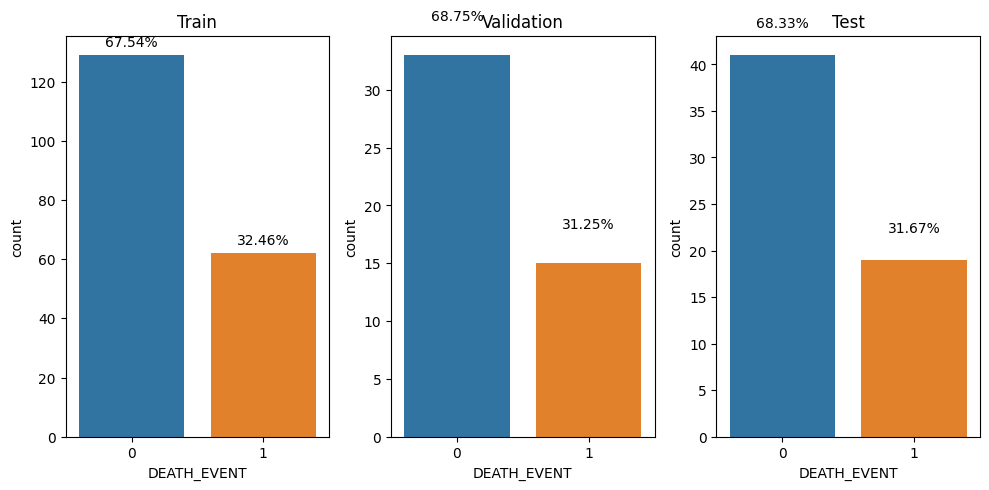

In [74]:
# Plot the bar chart with seaborn, with number of occurence and percentage needed.
datasets= {"Train": Y1_train,"Validation": Y1_valid, "Test": Y1_test}

fig, axs= plt.subplots(1, 3, figsize=(10, 5))

for i, (name, dataset) in enumerate(datasets.items()):
    total= len(dataset)
    ax= axs[i]

    # Countplot
    sns.countplot(x= "DEATH_EVENT", data= dataset, ax= ax)

    # Adding count and percentage
    for p in ax.patches:
        height= p.get_height()
        ax.text(p.get_x()+ p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Step 12: Applying SMOTENN to selected key features

The after sample data included:
- X_resampled_3,
- Y_resampled_3
- X_resampled_4,
- Y_resampled_4

In [75]:
# Method 3: sampling using minority method
from imblearn.combine import SMOTEENN
smote_enn_3= SMOTEENN(sampling_strategy= "minority")

# Fit smoteenn into X_train & Y_train
X_resampled_3, Y_resampled_3= smote_enn_3.fit_resample(X1_train, Y1_train)

In [76]:
# Method 4: sampling using minority method
from imblearn.combine import SMOTEENN
smote_enn_4= SMOTEENN(sampling_strategy= "not majority")

# Fit smoteenn into X_train & Y_train
X_resampled_4, Y_resampled_4= smote_enn_4.fit_resample(X1_train, Y1_train)

In [77]:
Y_resampled_3["DEATH_EVENT"].value_counts()

0    63
1    58
Name: DEATH_EVENT, dtype: int64

In [78]:
Y_resampled_4["DEATH_EVENT"].value_counts()

0    59
1    58
Name: DEATH_EVENT, dtype: int64

# Step 13: Applying Lazyclassifier on the key selected features

In [79]:
# Start by lazy classifier
# initialize LazyClassifier
clf_3 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the model into resampling_1 and valid data
models_3, predictions_3= clf_3.fit(X_resampled_3, X1_valid, Y_resampled_3, Y1_valid)

# Print the result
print(models_3)

100%|██████████| 29/29 [00:03<00:00,  8.56it/s]


[LightGBM] [Info] Number of positive: 58, number of negative: 63
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 121, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479339 -> initscore=-0.082692
[LightGBM] [Info] Start training from score -0.082692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [80]:
# Start by lazy classifier
# initialize LazyClassifier
clf_4= LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the model into resampling_1 and valid data
models_4, predictions_4 = clf_4.fit(X_resampled_4, X1_valid, Y_resampled_4, Y1_valid)

# Print the result
print(models_4)

100%|██████████| 29/29 [00:03<00:00,  7.64it/s]

[LightGBM] [Info] Number of positive: 58, number of negative: 59
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495726 -> initscore=-0.017094
[LightGBM] [Info] Start training from score -0.017094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Observation:

By only included 2 features in the model, both PassiveAggressiveClassifier with minority oversampling & LGBMClassifier with not majority oversampling perform the best with the accuracy of 0.77 and 0.72 ROC AUC.

Both metrices outperform the article's performance, with 18.5% increase in accuracy and 0.022 improved in ROC AUC.               

# Step 14: We build our own algorithms on Key Features Dataset


In [81]:
# Applying PassiveAggressiveClassifier, Catboost, SGDClassifier, XGB, LGBMClassifier, Spiking Neural Network
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

Step 14.1: We tested the linear model

In [82]:
# Minority with only key features using logistic regression
lr1= LogisticRegression()
lr1_model= lr1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
lr1_val_ypred= lr1_model.predict(X1_valid)
accuracy_lr1_val_pred= accuracy_score(Y1_valid, lr1_val_ypred)

# Predict test set
lr1_test_ypred= lr1_model.predict(X1_test)
accuracy_lr1_test_pred= accuracy_score(Y1_test, lr1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, lr1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, lr1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, lr1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test,lr1_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 68.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [83]:
# Not majority with only key features using logistic regression
lr2= LogisticRegression()
lr2_model= lr2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
lr2_val_ypred= lr2_model.predict(X1_valid)
accuracy_lr2_val_pred= accuracy_score(Y1_valid, lr2_val_ypred)

# Predict test set
lr2_test_ypred= lr2_model.predict(X1_test)
accuracy_lr2_test_pred= accuracy_score(Y1_test, lr2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, lr2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, lr2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, lr2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, lr2_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 68.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [84]:
# Minority with only key features using perceptron
p1= Perceptron(early_stopping= True, class_weight= "balanced")
p1_model= p1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
p1_val_ypred= p1_model.predict(X1_valid)
accuracy_p1_val_pred= accuracy_score(Y1_valid, p1_val_ypred)

# Predict test set
p1_test_ypred= p1_model.predict(X1_test)
accuracy_p1_test_pred= accuracy_score(Y1_test, p1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, p1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, p1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, p1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, p1_test_ypred)}")

Validation Set Accuracy : 31.25 %


Test Set Accuracy : 31.666666666666664 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.31      1.00      0.48        15

    accuracy                           0.31        48
   macro avg       0.16      0.50      0.24        48
weighted avg       0.10      0.31      0.15        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60



In [85]:
# Not majority with only key features using perceptron
p2= Perceptron(early_stopping= True, class_weight= "balanced")
p2_model= p2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
p2_val_ypred= p2_model.predict(X1_valid)
accuracy_p2_val_pred= accuracy_score(Y1_valid, p2_val_ypred)

# Predict test set
p2_test_ypred= p2_model.predict(X1_test)
accuracy_p2_test_pred= accuracy_score(Y1_test, p2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, p2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, p2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, p2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, p2_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 68.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [86]:
# Minority with only key features using cc
cc1= CalibratedClassifierCV(cv= 10)
cc1_model= cc1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
cc1_val_ypred= cc1_model.predict(X1_valid)
accuracy_cc1_val_pred= accuracy_score(Y1_valid, cc1_val_ypred)

# Predict test set
cc1_test_ypred= cc1_model.predict(X1_test)
accuracy_cc1_test_pred= accuracy_score(Y1_test, cc1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, cc1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, cc1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, cc1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, cc1_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 68.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [87]:
# Not majority with only key features using cc
cc2= CalibratedClassifierCV(cv= 10)
cc2_model= cc2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
cc2_val_ypred= cc2_model.predict(X1_valid)
accuracy_cc2_val_pred= accuracy_score(Y1_valid, cc2_val_ypred)

# Predict test set
cc2_test_ypred= cc2_model.predict(X1_test)
accuracy_cc2_test_pred= accuracy_score(Y1_test, cc2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, cc2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, cc2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, cc2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, cc2_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 68.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [88]:
# Minority with only key features using PassiveAggressiveClassifier
pac1= PassiveAggressiveClassifier(early_stopping= True)
pac1_model= pac1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
pac1_val_ypred= pac1_model.predict(X1_valid)
accuracy_pac1_val_pred= accuracy_score(Y1_valid, pac1_val_ypred)

# Predict test set
pac1_test_ypred= pac1_model.predict(X1_test)
accuracy_pac1_test_pred= accuracy_score(Y1_test, pac1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, pac1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, pac1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, pac1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, pac1_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 68.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       0.00      0.00      0.00        15

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [89]:
# Not majority with only key features using PassiveAggressiveClassifier
pac2= PassiveAggressiveClassifier(early_stopping= True)
pac2_model= pac2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
pac2_val_ypred= pac2_model.predict(X1_valid)
accuracy_pac2_val_pred= accuracy_score(Y1_valid, pac2_val_ypred)

# Predict test set
pac2_test_ypred= pac2_model.predict(X1_test)
accuracy_pac2_test_pred= accuracy_score(Y1_test, pac2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, pac2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, pac2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, pac2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, pac2_test_ypred)}")

Validation Set Accuracy : 31.25 %


Test Set Accuracy : 31.666666666666664 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.31      1.00      0.48        15

    accuracy                           0.31        48
   macro avg       0.16      0.50      0.24        48
weighted avg       0.10      0.31      0.15        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60



From the test and observation above, we noticed that linear model tend to lean toward one-side than another. Therefore, it makes linear model not an optimal option for the prediction and model building.

Step 14.2: We examine SVM & KNN


In [90]:
# Minority with only key features using svm
svm1= SVC(kernel= "rbf")
svm1_model= svm1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
svm1_val_ypred= svm1_model.predict(X1_valid)
accuracy_svm1_val_pred= accuracy_score(Y1_valid, svm1_val_ypred)

# Predict test set
svm1_test_ypred= svm1_model.predict(X1_test)
accuracy_svm1_test_pred= accuracy_score(Y1_test, svm1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, svm1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, svm1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, svm1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test,svm1_test_ypred)}")

Validation Set Accuracy : 56.25 %


Test Set Accuracy : 56.666666666666664 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        33
           1       0.31      0.33      0.32        15

    accuracy                           0.56        48
   macro avg       0.50      0.50      0.50        48
weighted avg       0.57      0.56      0.57        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        41
           1       0.27      0.21      0.24        19

    accuracy                           0.57        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.54      0.57      0.55        60



In [91]:
# Not majority with only key features using svm
svm2= SVC(kernel= "rbf")
svm2_model= svm2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
svm2_val_ypred= svm2_model.predict(X1_valid)
accuracy_svm2_val_pred= accuracy_score(Y1_valid, svm2_val_ypred)

# Predict test set
svm2_test_ypred= svm2_model.predict(X1_test)
accuracy_svm2_test_pred= accuracy_score(Y1_test, svm2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, svm2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, svm2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, svm2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, svm2_test_ypred)}")

Validation Set Accuracy : 72.91666666666666 %


Test Set Accuracy : 63.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.58      0.47      0.52        15

    accuracy                           0.73        48
   macro avg       0.68      0.66      0.67        48
weighted avg       0.72      0.73      0.72        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        41
           1       0.33      0.16      0.21        19

    accuracy                           0.63        60
   macro avg       0.51      0.51      0.49        60
weighted avg       0.57      0.63      0.59        60



In [92]:
# Minority with only key features using knn
knn1= KNeighborsClassifier(weights= "distance", algorithm= "auto")
knn1_model= knn1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
knn1_val_ypred= knn1_model.predict(X1_valid)
accuracy_knn1_val_pred= accuracy_score(Y1_valid, knn1_val_ypred)

# Predict test set
knn1_test_ypred= knn1_model.predict(X1_test)
accuracy_knn1_test_pred= accuracy_score(Y1_test, knn1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, knn1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, knn1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, knn1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, knn1_test_ypred)}")

Validation Set Accuracy : 62.5 %


Test Set Accuracy : 66.66666666666666 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        33
           1       0.42      0.53      0.47        15

    accuracy                           0.62        48
   macro avg       0.59      0.60      0.59        48
weighted avg       0.65      0.62      0.63        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.47      0.37      0.41        19

    accuracy                           0.67        60
   macro avg       0.60      0.59      0.59        60
weighted avg       0.65      0.67      0.65        60



In [93]:
# Not majority with only key features using knn
knn2= KNeighborsClassifier(weights= "distance", algorithm= "auto")
knn2_model= knn2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
knn2_val_ypred= knn2_model.predict(X1_valid)
accuracy_knn2_val_pred= accuracy_score(Y1_valid, knn2_val_ypred)

# Predict test set
knn2_test_ypred= knn2_model.predict(X1_test)
accuracy_knn2_test_pred= accuracy_score(Y1_test, knn2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, knn2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, knn2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, knn2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, knn2_test_ypred)}")

Validation Set Accuracy : 60.416666666666664 %


Test Set Accuracy : 63.33333333333333 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        33
           1       0.40      0.53      0.46        15

    accuracy                           0.60        48
   macro avg       0.57      0.58      0.57        48
weighted avg       0.64      0.60      0.62        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        41
           1       0.43      0.53      0.48        19

    accuracy                           0.63        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.65      0.63      0.64        60



Step 14.3: We exploring advanced machine learning model.

That included random forest, catboost, gradient boosting, extreme gradient boosting

In [94]:
# Minority with only key features using random forest
rf1= RandomForestClassifier(criterion= "entropy", class_weight= "balanced")
rf1_model= rf1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
rf1_val_ypred= rf1_model.predict(X1_valid)
accuracy_rf1_val_pred= accuracy_score(Y1_valid, rf1_val_ypred)

# Predict test set
rf1_test_ypred= rf1_model.predict(X1_test)
accuracy_rf1_test_pred= accuracy_score(Y1_test, rf1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, rf1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, rf1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, rf1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, rf1_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 71.66666666666667 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.50      0.67      0.57        15

    accuracy                           0.69        48
   macro avg       0.66      0.68      0.66        48
weighted avg       0.72      0.69      0.70        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.56      0.47      0.51        19

    accuracy                           0.72        60
   macro avg       0.67      0.65      0.66        60
weighted avg       0.71      0.72      0.71        60



In [95]:
# Not majority with only key features using random forest
rf2= RandomForestClassifier(criterion= "entropy", class_weight= "balanced")
rf2_model= rf2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
rf2_val_ypred= rf2_model.predict(X1_valid)
accuracy_rf2_val_pred= accuracy_score(Y1_valid, rf2_val_ypred)

# Predict test set
rf2_test_ypred= rf2_model.predict(X1_test)
accuracy_rf2_test_pred= accuracy_score(Y1_test, rf2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, rf2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, rf2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, rf2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, rf2_test_ypred)}")

Validation Set Accuracy : 66.66666666666666 %


Test Set Accuracy : 71.66666666666667 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.48      0.67      0.56        15

    accuracy                           0.67        48
   macro avg       0.65      0.67      0.64        48
weighted avg       0.71      0.67      0.68        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.56      0.53      0.54        19

    accuracy                           0.72        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.71      0.72      0.71        60



In [96]:
# Minority with only key features using cb
cb1= CatBoostClassifier()
cb1_model= cb1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
cb1_val_ypred= cb1_model.predict(X1_valid)
accuracy_cb1_val_pred= accuracy_score(Y1_valid, cb1_val_ypred)

# Predict test set
cb1_test_ypred= cb1_model.predict(X1_test)
accuracy_cb1_test_pred= accuracy_score(Y1_test, cb1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, cb1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, cb1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, cb1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, cb1_test_ypred)}")

Learning rate set to 0.004181
0:	learn: 0.6888026	total: 50.8ms	remaining: 50.7s
1:	learn: 0.6846980	total: 51.6ms	remaining: 25.8s
2:	learn: 0.6796480	total: 54.9ms	remaining: 18.2s
3:	learn: 0.6751506	total: 55.9ms	remaining: 13.9s
4:	learn: 0.6715779	total: 58ms	remaining: 11.5s
5:	learn: 0.6671078	total: 66.3ms	remaining: 11s
6:	learn: 0.6633649	total: 68.2ms	remaining: 9.68s
7:	learn: 0.6587713	total: 69.9ms	remaining: 8.67s
8:	learn: 0.6557135	total: 71.4ms	remaining: 7.86s
9:	learn: 0.6515097	total: 72.9ms	remaining: 7.21s
10:	learn: 0.6476953	total: 74.7ms	remaining: 6.72s
11:	learn: 0.6442713	total: 77.2ms	remaining: 6.36s
12:	learn: 0.6400541	total: 79.2ms	remaining: 6.02s
13:	learn: 0.6353112	total: 81ms	remaining: 5.7s
14:	learn: 0.6307569	total: 82.4ms	remaining: 5.41s
15:	learn: 0.6272615	total: 84ms	remaining: 5.17s
16:	learn: 0.6244145	total: 85.7ms	remaining: 4.96s
17:	learn: 0.6206812	total: 87.4ms	remaining: 4.77s
18:	learn: 0.6173784	total: 92.1ms	remaining: 4.76s
1

In [97]:
# Minority with only key features using cb
cb2= CatBoostClassifier()
cb2_model= cb2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
cb2_val_ypred= cb2_model.predict(X1_valid)
accuracy_cb2_val_pred= accuracy_score(Y1_valid, cb2_val_ypred)

# Predict test set
cb2_test_ypred= cb2_model.predict(X1_test)
accuracy_cb2_test_pred= accuracy_score(Y1_test, cb2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, cb2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, cb2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, cb2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, cb2_test_ypred)}")

Learning rate set to 0.004121
0:	learn: 0.6884928	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6833128	total: 16ms	remaining: 8s
2:	learn: 0.6789241	total: 23.7ms	remaining: 7.88s
3:	learn: 0.6749655	total: 25.3ms	remaining: 6.29s
4:	learn: 0.6709449	total: 29.3ms	remaining: 5.84s
5:	learn: 0.6664986	total: 31.5ms	remaining: 5.22s
6:	learn: 0.6621527	total: 36.4ms	remaining: 5.16s
7:	learn: 0.6573965	total: 39.7ms	remaining: 4.93s
8:	learn: 0.6529685	total: 43.2ms	remaining: 4.76s
9:	learn: 0.6490437	total: 47.4ms	remaining: 4.69s
10:	learn: 0.6460870	total: 50.3ms	remaining: 4.52s
11:	learn: 0.6419643	total: 53.3ms	remaining: 4.39s
12:	learn: 0.6378796	total: 59.1ms	remaining: 4.49s
13:	learn: 0.6336600	total: 62.9ms	remaining: 4.43s
14:	learn: 0.6288690	total: 67.1ms	remaining: 4.41s
15:	learn: 0.6252090	total: 71.2ms	remaining: 4.38s
16:	learn: 0.6213867	total: 73.3ms	remaining: 4.24s
17:	learn: 0.6187023	total: 78.6ms	remaining: 4.29s
18:	learn: 0.6156367	total: 81ms	remaining: 4.18s

In [98]:
# Minority with only key features using gb
gb1= GradientBoostingClassifier(loss= "exponential", criterion= "friedman_mse", min_samples_split= 2, max_depth= 5, max_features= "log2")
gb1_model= gb1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
gb1_val_ypred= gb1_model.predict(X1_valid)
accuracy_gb1_val_pred= accuracy_score(Y1_valid, gb1_val_ypred)

# Predict test set
gb1_test_ypred= gb1_model.predict(X1_test)
accuracy_gb1_test_pred= accuracy_score(Y1_test, gb1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, gb1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, gb1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, gb1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, gb1_test_ypred)}")

Validation Set Accuracy : 70.83333333333334 %


Test Set Accuracy : 71.66666666666667 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.53      0.67      0.59        15

    accuracy                           0.71        48
   macro avg       0.68      0.70      0.68        48
weighted avg       0.73      0.71      0.72        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.56      0.47      0.51        19

    accuracy                           0.72        60
   macro avg       0.67      0.65      0.66        60
weighted avg       0.71      0.72      0.71        60



In [99]:
# Not majority with only key features using gb
gb2= GradientBoostingClassifier(loss= "exponential", criterion= "friedman_mse", min_samples_split= 2, max_depth= 5, max_features= "log2")
gb2_model= gb2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
gb2_val_ypred= gb2_model.predict(X1_valid)
accuracy_gb2_val_pred= accuracy_score(Y1_valid, gb2_val_ypred)

# Predict test set
gb2_test_ypred= gb2_model.predict(X1_test)
accuracy_gb2_test_pred= accuracy_score(Y1_test, gb2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, gb2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, gb2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, gb2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, gb2_test_ypred)}")

Validation Set Accuracy : 68.75 %


Test Set Accuracy : 71.66666666666667 %


Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.67      0.75        33
           1       0.50      0.73      0.59        15

    accuracy                           0.69        48
   macro avg       0.67      0.70      0.67        48
weighted avg       0.74      0.69      0.70        48

Test Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.56      0.53      0.54        19

    accuracy                           0.72        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.71      0.72      0.71        60



In [100]:
# Minority with only key features using lgb
lgb1= LGBMClassifier(boosting_type= "gbdt", learning_rate= 0.1)
lgb1_model= lgb1.fit(X_resampled_3, Y_resampled_3)

# Work with valid set
lgb1_val_ypred= lgb1_model.predict(X1_valid)
accuracy_lgb1_val_pred= accuracy_score(Y1_valid, lgb1_val_ypred)

# Predict test set
lgb1_test_ypred= lgb1_model.predict(X1_test)
accuracy_lgb1_test_pred= accuracy_score(Y1_test, lgb1_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, lgb1_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, lgb1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, lgb1_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, lgb1_test_ypred)}")

[LightGBM] [Info] Number of positive: 58, number of negative: 63
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 121, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479339 -> initscore=-0.082692
[LightGBM] [Info] Start training from score -0.082692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [101]:
# Not majority with only key features using lgb
lgb2= LGBMClassifier(boosting_type= "gbdt", learning_rate= 0.1, class_weight= "balanced")
lgb2_model= lgb2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
lgb2_val_ypred= lgb2_model.predict(X1_valid)
accuracy_lgb2_val_pred= accuracy_score(Y1_valid, lgb2_val_ypred)

# Predict test set
lgb2_test_ypred= lgb2_model.predict(X1_test)
accuracy_lgb2_test_pred= accuracy_score(Y1_test, lgb2_test_ypred)

# Print the accuracy
print(f"Validation Set Accuracy : {accuracy_score(Y1_valid, lgb2_val_ypred) * 100} %\n\n")
print(f"Test Set Accuracy : {accuracy_score(Y1_test, lgb2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Validation Classification Report : \n\n{classification_report(Y1_valid, lgb2_val_ypred)}")
print(f"Test Classification Report : \n\n{classification_report(Y1_test, lgb2_test_ypred)}")

[LightGBM] [Info] Number of positive: 58, number of negative: 59
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# Step 14: Comparing Voting Classifier and Stacking Classifier

In [102]:
# Not majority with only key features using hard votingclassifier
# Using lgb2 and cat2
knn2= KNeighborsClassifier(weights= "distance", algorithm= "auto")
rf2= RandomForestClassifier(criterion= "entropy", class_weight= "balanced")
lgb2= LGBMClassifier(boosting_type= "gbdt", learning_rate= 0.1)
cb2= CatBoostClassifier()

vot_h1= VotingClassifier(estimators= [("knn2", knn2), ("rf2", rf2)], voting= "hard")
vot_h1_model= vot_h1.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
vot1_val_ypred= vot_h1_model.predict(X1_valid)
accuracy_vot1_val_pred= accuracy_score(Y1_valid, vot1_val_ypred)

# Predict test set
vot1_test_ypred= vot_h1_model.predict(X1_test)
accuracy_vot1_test_pred= accuracy_score(Y1_test, vot1_test_ypred)

# Print the accuracy
print(f"Hard Voting Validation Set Accuracy : {accuracy_score(Y1_valid, vot1_val_ypred) * 100} %\n\n")
print(f"Hard Voting Test Set Accuracy : {accuracy_score(Y1_test, vot1_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Hard Voting Validation Classification Report : \n\n{classification_report(Y1_valid, vot1_val_ypred)}")
print(f"Hard Voting Test Classification Report : \n\n{classification_report(Y1_test, vot1_test_ypred)}")

Hard Voting Validation Set Accuracy : 68.75 %


Hard Voting Test Set Accuracy : 73.33333333333333 %


Hard Voting Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.50      0.53      0.52        15

    accuracy                           0.69        48
   macro avg       0.64      0.65      0.64        48
weighted avg       0.69      0.69      0.69        48

Hard Voting Test Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.62      0.42      0.50        19

    accuracy                           0.73        60
   macro avg       0.69      0.65      0.66        60
weighted avg       0.72      0.73      0.72        60



In [103]:
# Not majority with only key features using soft votingclassifier
# Using lgb2 and cat2
knn2= KNeighborsClassifier(weights= "distance", algorithm= "auto")
rf2= RandomForestClassifier(criterion= "entropy", class_weight= "balanced")
lgb2= LGBMClassifier(boosting_type= "gbdt", learning_rate= 0.1)
cb2= CatBoostClassifier()

vot_h2= VotingClassifier(estimators= [("knn2", knn2), ("rf2", rf2)], voting= "soft")
vot_h2_model= vot_h2.fit(X_resampled_4, Y_resampled_4)

# Work with valid set
vot2_val_ypred= vot_h2_model.predict(X1_valid)
accuracy_vot2_val_pred= accuracy_score(Y1_valid, vot2_val_ypred)

# Predict test set
vot2_test_ypred= vot_h2_model.predict(X1_test)
accuracy_vot2_test_pred= accuracy_score(Y1_test, vot2_test_ypred)

# Print the accuracy
print(f"Soft Voting Validation Set Accuracy : {accuracy_score(Y1_valid, vot2_val_ypred) * 100} %\n\n")
print(f"Soft Voting Test Set Accuracy : {accuracy_score(Y1_test, vot2_test_ypred) * 100} %\n\n")

# Model evaluation
print(f"Soft Voting Validation Classification Report : \n\n{classification_report(Y1_valid, vot2_val_ypred)}")
print(f"Soft Voting Test Classification Report : \n\n{classification_report(Y1_test, vot2_test_ypred)}")

Soft Voting Validation Set Accuracy : 58.333333333333336 %


Soft Voting Test Set Accuracy : 66.66666666666666 %


Soft Voting Validation Classification Report : 

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        33
           1       0.39      0.60      0.47        15

    accuracy                           0.58        48
   macro avg       0.58      0.59      0.56        48
weighted avg       0.64      0.58      0.60        48

Soft Voting Test Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.68      0.74        41
           1       0.48      0.63      0.55        19

    accuracy                           0.67        60
   macro avg       0.64      0.66      0.64        60
weighted avg       0.70      0.67      0.68        60



# Step 15: We now explore model explainer such as SHAP & dashboardexplainer

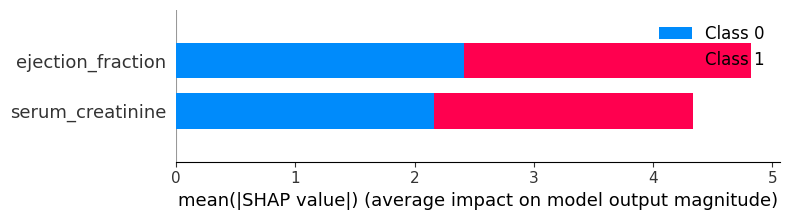

In [104]:
# Exploring SHAP with lgb2
import shap
explainer_lgb2= shap.Explainer(lgb2_model)
shap_values_lgb2= explainer_lgb2.shap_values(X1_test)
shap.summary_plot(shap_values, X1_test)

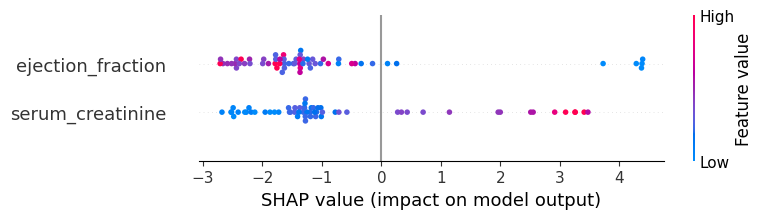

In [105]:
# Exploring SHAP with cb2
explainer_cb2= shap.Explainer(cb2_model)
shap_values_cb2= explainer_cb2.shap_values(X1_test)
shap.summary_plot(shap_values_cb2, X1_test)

In [106]:
# Exploring dashboard explainer with lgb2
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
ed_lgb2 = ClassifierExplainer(lgb2_model, X1_test, Y1_test)
ExplainerDashboard(ed_lgb2).run()

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classific

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary:

In this machine learning task, we implemented a range of machine learning algorithms, from simple to advanced, following with the use of oversampling technique (both minority and not majority).

The excellent result is achieved with the sample set using "not majority" oversampling techniques. Among the algorithms, catboost and lightgradientboosting perform the best, reaching a balanced accuracy of 77%, which effective in predicting both binary numbers.

This shown an 18% increase of the accuracy rate as compared to the article "machine learning can predict survival of patients with serum creatinine and ejection fraction.

Both algorithm are effective in predicting 0 with 80% precision rate and 1 with average 70% precision rate.

While if we look at the performance of the algorithms with "minority" sampling method, the performance of catbost, gradient boosting and lightgradient boosting are all similar, achieving overall accuracy of 72%, a 13% increase in accuracy as compare to the article.

All of the models are achieving a precision od 72% in predicting 0 and 56% in predicting 1.
